In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from matplotlib import style

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_parquet("sales_merged.parquet")

In [3]:
df

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,isPromoted,Discount,BeginDate,EndDate,Promo,DStep,WeekStartDate
0,2022-03-28,2854400,2879223,2878715,568,29,Afyon,SANDIKLI,31401,2,0,0,0.000000,NaT,NaT,None,NaN,2022-03-28
1,2022-05-30,2854400,2879223,2878715,568,29,Afyon,SANDIKLI,31401,5,0,0,0.000000,NaT,NaT,None,NaN,2022-05-30
2,2023-02-20,2854400,2879223,2878715,568,29,Afyon,SANDIKLI,31401,10,0,0,0.000000,NaT,NaT,None,NaN,2023-02-20
3,2022-12-07,2854404,2879223,2878715,568,29,Afyon,SANDIKLI,31401,5,0,0,0.000000,NaT,NaT,None,NaN,2022-12-05
4,2022-03-10,2854409,2879223,2878715,568,29,Afyon,SANDIKLI,31401,5,0,0,0.000000,NaT,NaT,None,NaN,2022-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907129,2022-12-30,2865872,2879266,2878721,502,45,Denizli,ÇİVRİL,200501,20,20,1,0.500000,NaT,NaT,None,NaN,2022-12-26
8907130,2022-12-30,2866034,2879266,2878721,505,45,Denizli,PAMUKKALE,200003,5,5,1,0.500000,NaT,NaT,None,NaN,2022-12-26
8907131,2022-12-06,2868669,2879249,2878781,502,45,Isparta,MERKEZ,320003,80,4,1,0.047619,NaT,NaT,None,NaN,2022-12-05
8907132,2022-12-06,2868669,2879249,2878781,504,45,Isparta,MERKEZ,320003,20,1,1,0.047619,NaT,NaT,None,NaN,2022-12-05


In [4]:
df = df[df['Promo'].apply(lambda x: isinstance(x, str))]

In [5]:
df

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,isPromoted,Discount,BeginDate,EndDate,Promo,DStep,WeekStartDate
18,2023-05-11,2854424,2879223,2878715,568,29,Afyon,SİNANPAŞA,31301,3,0,0,0.000000,2023-05-08,2023-05-12,9-1,0.100000,2023-05-08
81,2023-05-10,2854470,2879223,2878715,568,29,Afyon,EMİRDAĞ,30501,10,0,0,0.000000,2023-05-08,2023-05-12,9-1,0.100000,2023-05-08
220,2023-05-09,2868544,2879223,2878715,568,29,Isparta,SENİRKENT,320301,5,0,0,0.000000,2023-05-08,2023-05-12,9-1,0.100000,2023-05-08
240,2023-05-11,2873090,2879223,2878715,568,29,Kütahya,MERKEZ,430003,5,0,0,0.000000,2023-05-08,2023-05-12,9-1,0.100000,2023-05-08
316,2023-05-10,2877774,2879223,2878715,568,29,Uşak,MERKEZ,640001,20,0,0,0.000000,2023-05-08,2023-05-12,9-1,0.100000,2023-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903836,2022-12-09,2855699,2879266,2923953,47280,148,İstanbul,ATAŞEHİR,341610,10,1,1,0.090909,2022-12-01,2023-01-01,10-1,0.090909,2022-12-05
8903837,2022-12-09,2856798,2879266,2923953,47280,148,İstanbul,ÜMRANİYE,342504,20,2,1,0.090909,2022-12-01,2023-01-01,10-1,0.090909,2022-12-05
8903838,2022-12-09,2856798,2879266,2923953,47280,148,İstanbul,ÜMRANİYE,342504,10,1,1,0.090909,2022-12-01,2023-01-01,10-1,0.090909,2022-12-05
8903839,2022-12-09,2855054,2879266,2923953,47280,148,İstanbul,BEYKOZ,340801,10,1,1,0.090909,2022-12-01,2023-01-01,10-1,0.090909,2022-12-05


In [6]:
df["ProductId"].unique()

array([ 29,  41,  14,  38, 148,  32,  39, 138,  49,  21,  30,  20,  16],
      dtype=int64)

In [7]:
df["TotalQty"] = df["PaidQty"] + df["FreeQty"]

C:\Users\ayigi\AppData\Local\Temp\ipykernel_77524\2642408938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalQty"] = df["PaidQty"] + df["FreeQty"]


# Demand Forecasting

In [9]:
sales_all = df.groupby([df['Date'].dt.date, df["ProductId"]])['TotalQty'].sum()
sales_all = pd.DataFrame(sales_all).reset_index()
sales_all['Date'] = pd.to_datetime(sales_all['Date'])
extreme_dates = sales_all[sales_all["TotalQty"]>10000].groupby("Date")["Date"].count()
extreme_dates = pd.DataFrame({"Date":extreme_dates.index, "Occurence":extreme_dates}).reset_index(drop=True)

In [12]:
extreme_dates.sort_values(by="Occurence", ascending=False)

,Date,Occurence
167,2023-05-08,7
169,2023-05-10,7
168,2023-05-09,7
134,2023-01-11,6
177,2023-06-08,6
...,...,...
121,2022-12-07,1
48,2022-05-27,1
116,2022-11-30,1
115,2022-11-28,1


In [8]:
# Prod. ID's: 14,  16,  20,  21,  29,  30,  32,  38,  39,  41,  49, 138, 148
product_id = 20
df_product = df[df["ProductId"] == product_id]
sales = df_product.groupby([df_product['Date'].dt.date])['TotalQty'].sum()
sales = pd.DataFrame({"Date":sales.index, "Sales":sales}).reset_index(drop=True)
sales['Date'] = pd.to_datetime(sales['Date'])

In [9]:
sales.sort_values(by="Sales", ascending=False)

,Date,Sales
517,2023-07-03,21082
427,2023-04-04,18742
463,2023-05-10,16695
461,2023-05-08,15864
518,2023-07-04,15838
...,...,...
444,2023-04-21,32
229,2022-09-18,32
222,2022-09-11,32
68,2022-04-10,32


In [10]:
split_date = dt.datetime(2023, 6, 1)
train = sales[sales["Date"] < split_date]
test = sales[sales["Date"] >= split_date]

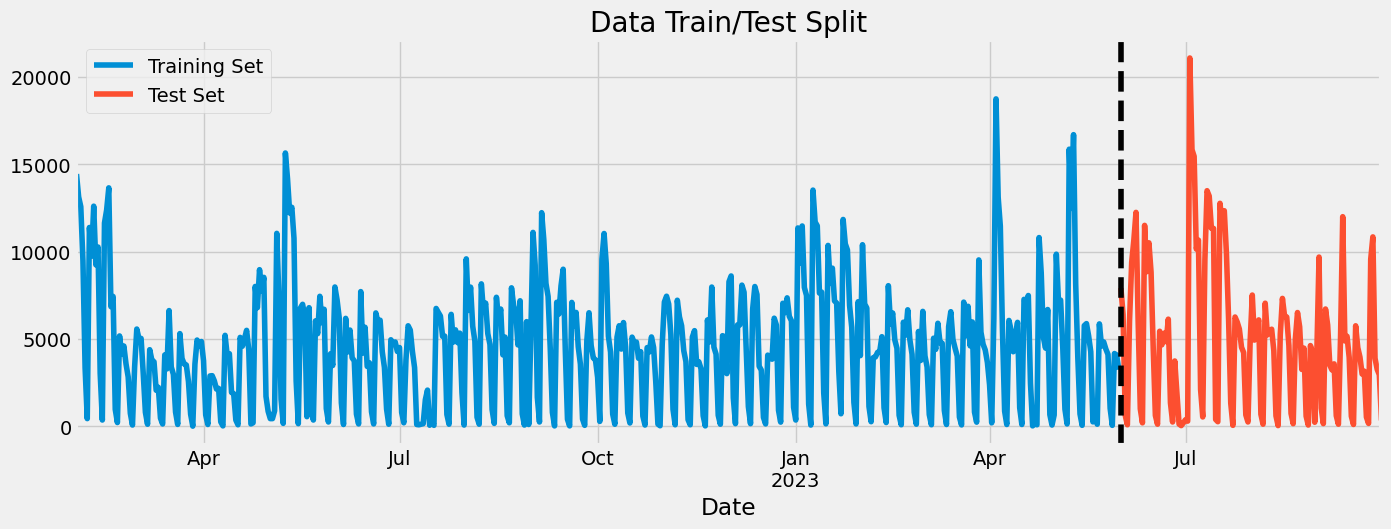

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
train.set_index("Date").plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.set_index("Date").plot(ax=ax, label='Test Set')
ax.axvline(split_date, color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [12]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df["Date"].dt.isocalendar()["day"]
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df["Date"].dt.month
    df['year'] = df["Date"].dt.isocalendar()["year"]
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df["Date"].dt.day
    df['weekofyear'] = df["Date"].dt.isocalendar()["week"]
    
    return df

In [13]:
sales = create_features(sales)

In [14]:
sales

,Date,Sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2022-02-01,14443,2,1,2,2022,32,1,5
1,2022-02-02,13135,3,1,2,2022,33,2,5
2,2022-02-03,12573,4,1,2,2022,34,3,5
3,2022-02-04,9476,5,1,2,2022,35,4,5
4,2022-02-05,3346,6,1,2,2022,36,5,5
...,...,...,...,...,...,...,...,...,...
602,2023-09-26,10846,2,3,9,2023,269,26,39
603,2023-09-27,3898,3,3,9,2023,270,27,39
604,2023-09-28,3272,4,3,9,2023,271,28,39
605,2023-09-29,2957,5,3,9,2023,272,29,39


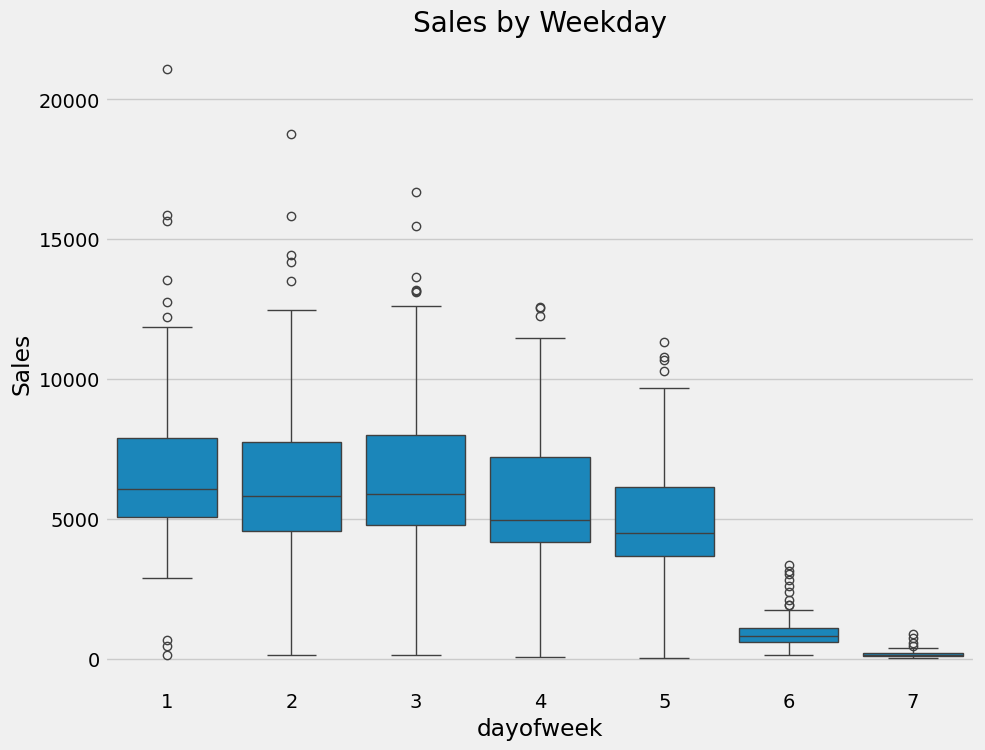

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=sales, x='dayofweek', y='Sales')
ax.set_title('Sales by Weekday')
plt.show()

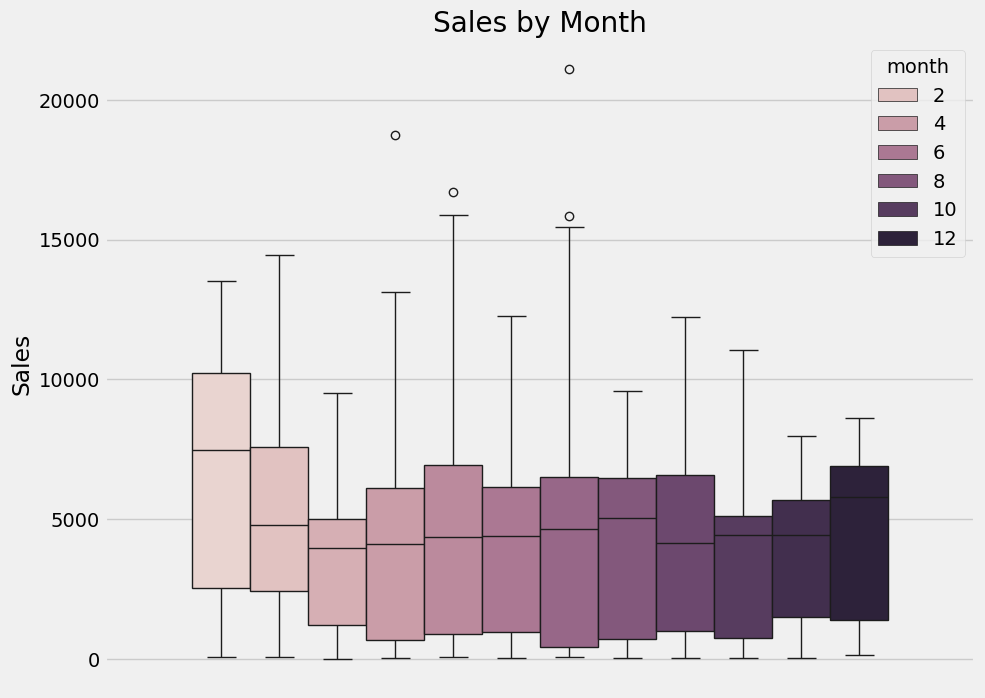

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=sales, hue='month', y='Sales')
ax.set_title('Sales by Month')
plt.show()

In [17]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']
TARGET = 'Sales'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [18]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:5636.16595	validation_1-rmse:6477.19428
[100]	validation_0-rmse:2877.67249	validation_1-rmse:4072.29208
[200]	validation_0-rmse:2139.02674	validation_1-rmse:3301.58833
[300]	validation_0-rmse:1905.58528	validation_1-rmse:3096.40969
[400]	validation_0-rmse:1749.18384	validation_1-rmse:3106.48553
[419]	validation_0-rmse:1724.08401	validation_1-rmse:3122.57959


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Feature Importance

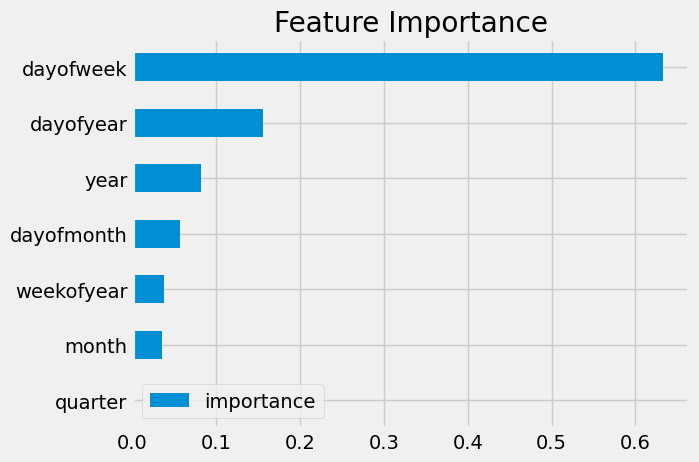

In [19]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

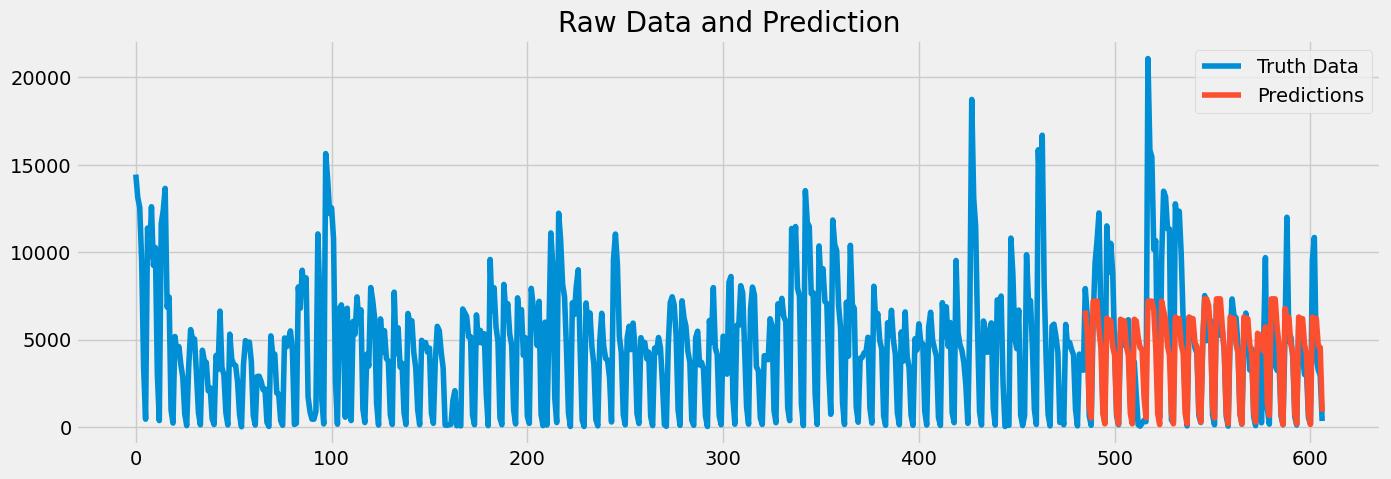

In [20]:
test['prediction'] = reg.predict(X_test)
sales = sales.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = sales[['Sales']].plot(figsize=(15, 5))
sales['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [21]:
score = [np.sqrt(mean_squared_error(test['Sales'], test['prediction'])),
         mean_absolute_percentage_error(test['Sales'], test['prediction'])]
print(f'RMSE Score on Test set: {score[0]:0.2f}')
print(f'MAPE Score on Test set: {score[1]:0.2f}')

RMSE Score on Test set: 3061.06
MAPE Score on Test set: 1.89


In [22]:
test

,Date,Sales,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
485,2023-06-01,7920,4,2,6,2023,152,1,22,6662.849121
486,2023-06-02,6403,5,2,6,2023,153,2,22,5442.879883
487,2023-06-03,640,6,2,6,2023,154,3,22,1167.830444
488,2023-06-04,96,7,2,6,2023,155,4,22,511.441101
489,2023-06-05,6041,1,2,6,2023,156,5,23,7202.511230
...,...,...,...,...,...,...,...,...,...,...
602,2023-09-26,10846,2,3,9,2023,269,26,39,6199.638672
603,2023-09-27,3898,3,3,9,2023,270,27,39,6199.638672
604,2023-09-28,3272,4,3,9,2023,271,28,39,4633.967285
605,2023-09-29,2957,5,3,9,2023,272,29,39,4559.704102


# Time Series Approach